In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import fontManager, FontProperties
fontManager.addfont("c:/code/Pretendard-Light.otf")
fontProp=FontProperties(fname="c:/code/Pretendard-Light.otf")
sns.set(font=fontProp.get_name(),style="whitegrid",palette="muted")
figsize=(8,4)

In [26]:
studentMaanzock=pd.read_clipboard()

studentMaanzockCode={
	"매우 그렇다":5,
	"그렇다":4,
	"보통":3,
	"아니다":2,
	"매우 아니다":1,
}

questions=[q for q in studentMaanzock.columns if q.startswith("다음 질문")]

studentMaanzock.loc[:,
    [q for q in studentMaanzock.columns if q.startswith("다음 질문")]]=studentMaanzock.loc[:,
    [q for q in studentMaanzock.columns if q.startswith("다음 질문")]].map(lambda q:studentMaanzockCode[q])

In [27]:
studentMaanzock.sample(3)

,성별,연령,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [1. 나는 주어진 실습내용을 정확히 파악하고 수행하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [2. 나는 습득한 전공지식을 실무에 적용하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [3. 나는 현장(임상)실습을 통해 실무능력이 향상되었다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [4. 나는 실습기간동안 활동적이고 적극적인 자세로 임하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [5. 나는 실습 규정을 지키고 성실하게 실습을 수행하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [6. 나는 실습기관에서 효과적인 의사소통으로 원만한 인간관계를 형성하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [7. 학과는 현장실습을 위해 사전교육을 체계적으로 실시하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [8. 실습기간 동안 지도교수의 방문지도 횟수와 현장실습지도 내용은 적절하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [9. 현장(임상)실습기관은 실습하기에 적합하였다.],다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [10. 실습지도자는 실습에 필요한 지도를 적절히 해주었다.],느낀 점이나 건의사항이 있으시면 자유롭게 작성해 주세요.
85,여,20대,4,4,4,4,4,4,4,4,5,4,NaN
2,여,20대,4,4,4,4,4,4,4,4,4,4,없음
95,여,20대,4,4,4,4,4,4,4,4,5,4,NaN


In [30]:
studentMaanzock[questions].mean().reset_index()

,index,0
0,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [1. 나는 주어진 실습내용을...,4.344828
1,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [2. 나는 습득한 전공지식을...,4.234483
2,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [3. 나는 현장(임상)실습을...,4.365517
3,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [4. 나는 실습기간동안 활동...,4.186207
4,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [5. 나는 실습 규정을 지키...,4.337931
5,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [6. 나는 실습기관에서 효과...,4.241379
6,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [7. 학과는 현장실습을 위해...,4.227586
7,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [8. 실습기간 동안 지도교수...,4.255172
8,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [9. 현장(임상)실습기관은 ...,4.537931
9,다음 질문을 읽으시고 해당되는 곳에 표시해 주십시오. [10. 실습지도자는 실습에 ...,4.2


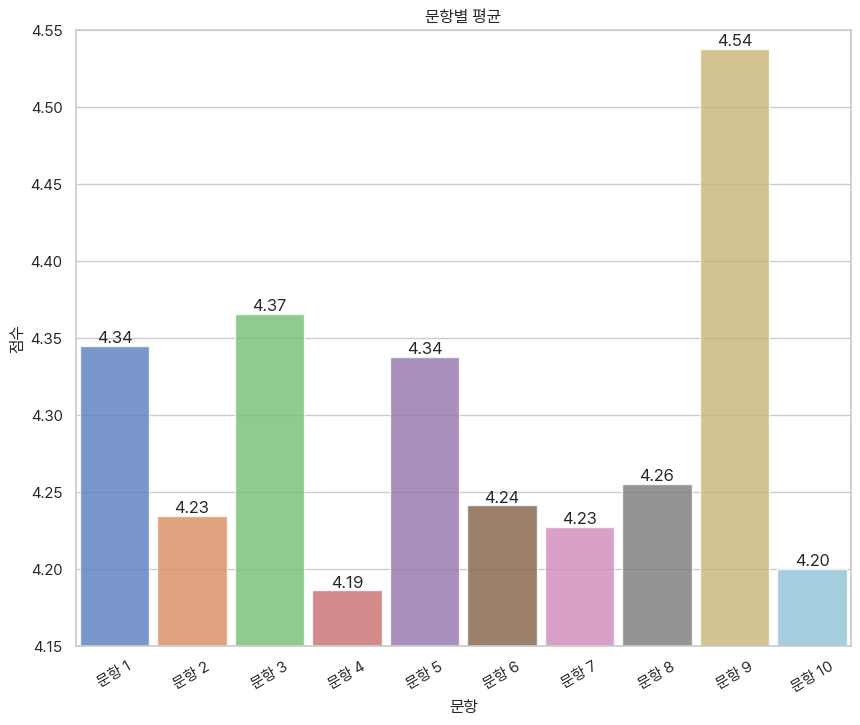

In [35]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(studentMaanzock[questions].mean().reset_index(),x="index",y=0,alpha=.8,width=.9,ax=ax)
ax.set_title("문항별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)],rotation=30)
ax.set_ylabel("점수")
ax.set_ylim(4.15,4.55)

for container in ax.containers:
    ax.bar_label(container,labels=[f"{q:.2f}" for q in studentMaanzock[questions].mean().reset_index().loc[:,0]])

In [47]:
sex=studentMaanzock["성별"].value_counts().reset_index().rename({"count":"응답자 수"},axis=1)

Text(0.5, 4.4444444444444375, '응답자 수')

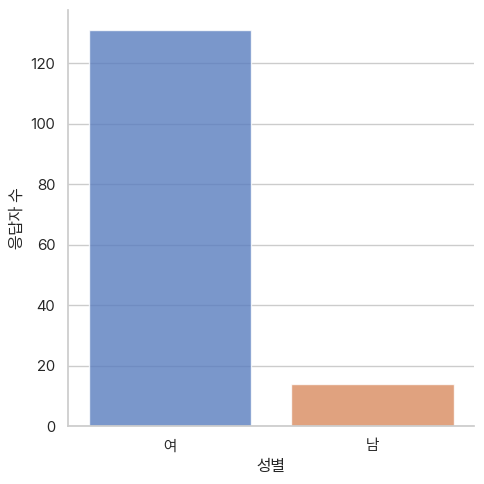

In [48]:
sns.catplot(sex,x="성별",y="응답자 수",kind="bar",alpha=.8)
ax.set_ylabel("응답자 성별")
ax.set_xlabel("응답자 수")

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
sns.catplot(age,x="응답자 수",y="연령",kind="bar")
ax.set_title("연령대별 응답자 수")
ax.set_ylabel("응답자 연령대")

ValueError: Could not interpret input 'index'

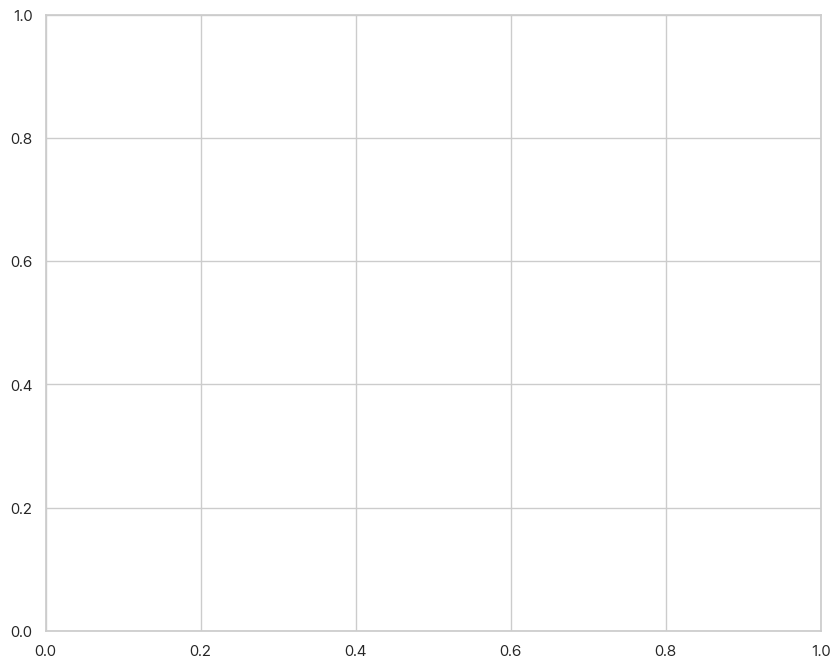

In [14]:
bySex=studentMaanzock.melt("성별",questions)
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(bySex,hue="성별",x="variable",y="value",ax=ax,alpha=.8,width=.9,errorbar=None)
ax.set_title("성별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)],rotation=30)
ax.set_ylabel("점수")
ax.set_ylim(4.0,4.6)

byAge=studentMaanzock.melt("연령",questions)
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(byAge,hue="연령",x="variable",y="value",ax=ax,alpha=.7,errorbar=None)
ax.set_title("연령대별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)],rotation=30)
ax.set_ylabel("점수")
ax.set_ylim(3.25,5)



fig,ax=plt.subplots(figsize=(10,8))
sns.catplot(age,x="응답자 수",y="연령",kind="bar")
ax.set_title("연령대별 응답자 수")
ax.set_ylabel("응답자 연령대")
ax.set_xscale("log")
for container in ax.containers:
    ax.bar_label(container,labels=[f"{q:.0f}" for q in age["응답자 수"]])
plt.show()

In [9]:
scoreCols=[f"q{q}" for q in range(1,11)]
maanzock=pd.read_csv("c:/code/maanzock.csv")

In [10]:
byQuestion=maanzock[scoreCols].mean().reset_index().rename({0:"score"},axis=1)
byQuestion["scoreLog10"]=np.log10(byQuestion.score)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19328\580611111.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{10**q:.3f}" for q in ax.get_yticks()])


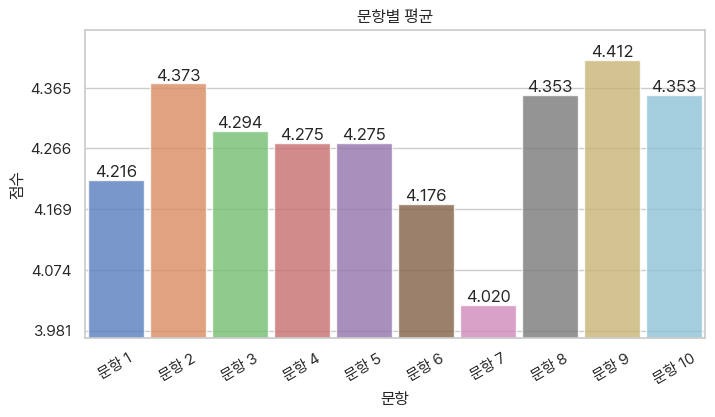

In [11]:
fig,ax=plt.subplots(figsize=figsize)
ax=sns.barplot(byQuestion,x="index",y="scoreLog10",ax=ax,alpha=.8,width=.9)

ax.set_title("문항별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)],rotation=30)
ax.set_ylabel("점수")
ax.set_ylim(np.log10(byQuestion.score.min()-.05),np.log10(byQuestion.score.max()+.05))
ax.set_yticklabels([f"{10**q:.3f}" for q in ax.get_yticks()])

for container in ax.containers:
    ax.bar_label(container,labels=[f"{q:.3f}" for q in byQuestion.score])

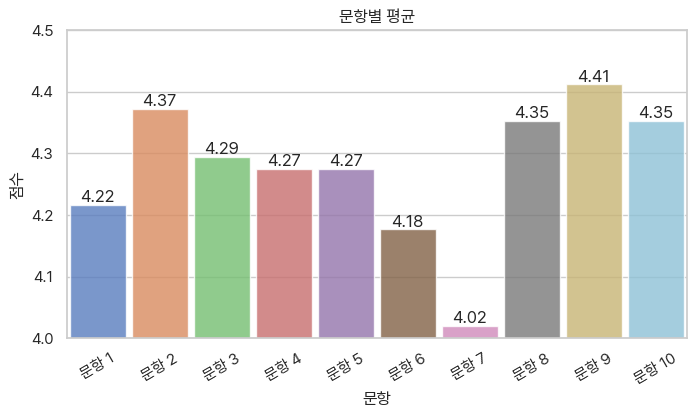

In [12]:
fig,ax=plt.subplots(figsize=figsize)
ax=sns.barplot(byQuestion,x="index",y="score",ax=ax,alpha=.8,width=.9)

ax.set_title("문항별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)],rotation=30)
ax.set_ylabel("점수")
ax.set_ylim(4.0,4.5)

for container in ax.containers:
    ax.bar_label(container,labels=[f"{q:.2f}" for q in byQuestion.score])

In [13]:
## 과목별 mean agg
byClass=maanzock.melt("trainingClass",scoreCols)

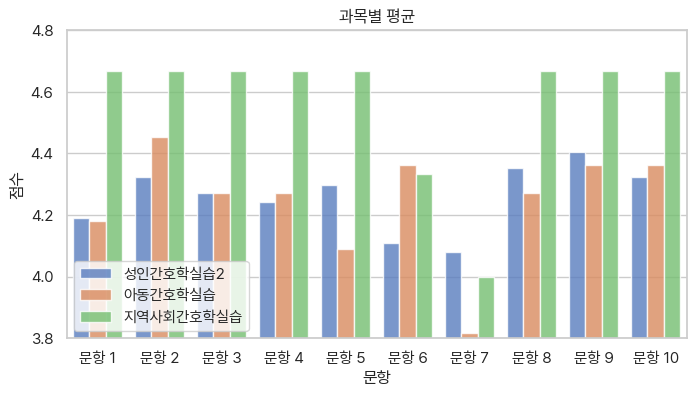

In [14]:
## byClass
fig,ax=plt.subplots(figsize=figsize)
ax=sns.barplot(byClass,hue="trainingClass",x="variable",y="value",ax=ax,alpha=.8,width=.8,errorbar=None)
ax.set_title("과목별 평균")
ax.set_xlabel("문항")
ax.set_ylabel("점수")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)])
ax.set_ylim(3.8,4.8)
ax.get_legend().set_title("")
sns.move_legend(
    ax,loc="lower left"
)

In [15]:
byCompany=maanzock.melt("trainingCompany",scoreCols)
byCompany

,trainingCompany,variable,value
0,순천향대학교 구미병원,q1,4
1,한림대학교 한강성심병원,q1,4
2,순천향대학교 구미병원,q1,4
3,대전을지대학교병원,q1,4
4,대전을지대학교병원,q1,4
...,...,...,...
505,산본제일병원,q10,4
506,센트럴병원,q10,5
507,문경시보건소,q10,4
508,상주시보건소,q10,5


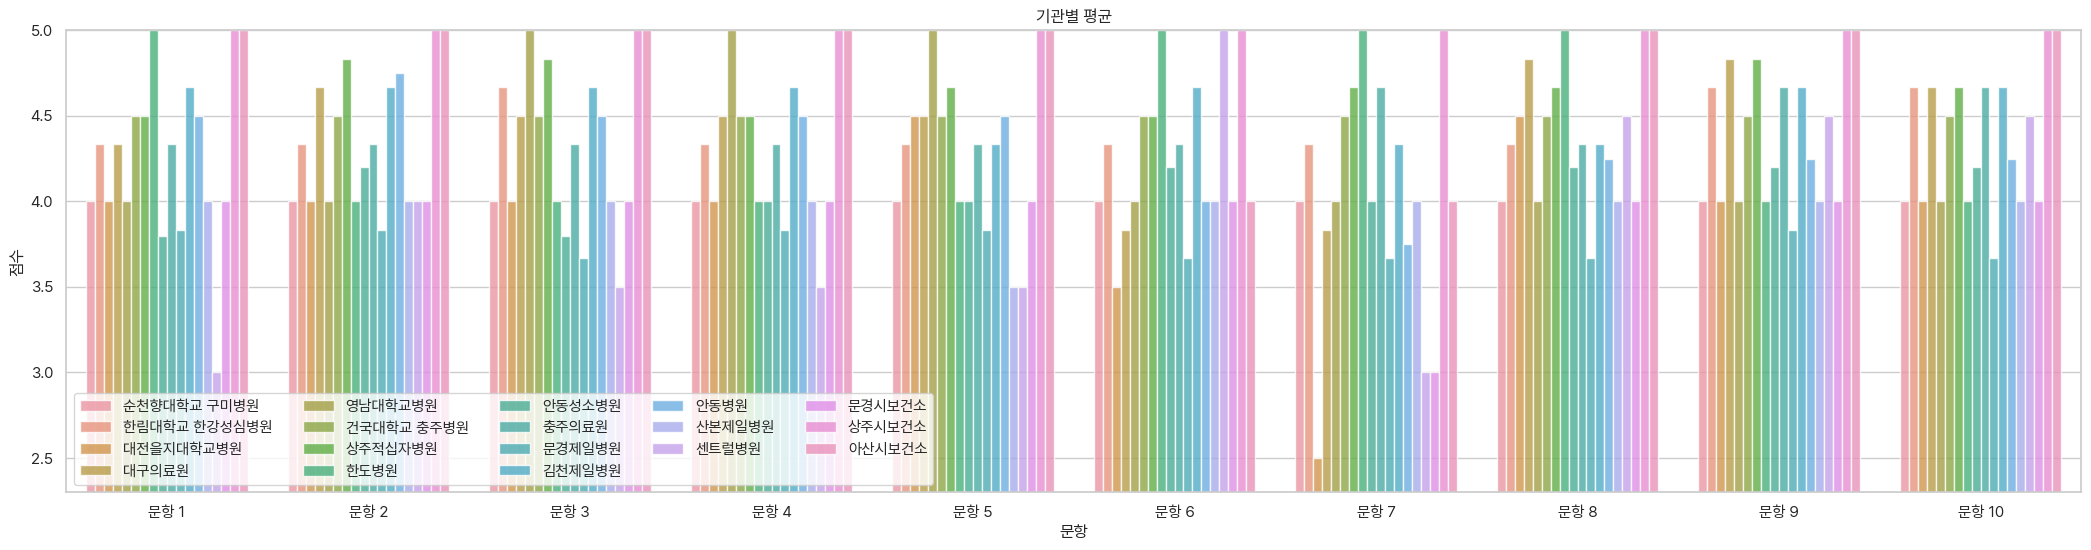

In [16]:
fig,ax=plt.subplots(figsize=(26,6))
ax=sns.barplot(
    byCompany,x="variable",y="value",hue="trainingCompany",
    ax=ax,
    errorbar=None,alpha=.8,)
ax.set_title("기관별 평균")
ax.set_xlabel("문항"),ax.set_ylabel("점수")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)])
ax.set_ylim(2.3,5)
sns.move_legend(
    ax,
    title=None,
    loc="lower left",
    ncol=5,
)

In [17]:
def _expStrToNum(e):
    f=int(e[:e.find("년")]) if isinstance(e,str) else e
    return f

trLeaderExp=maanzock.trainingLeaderExperience.map(_expStrToNum)
maanzock["trainingLeaderExperience"]=trLeaderExp.fillna(trLeaderExp.mean()).astype(int)

trLeaderExpBins=pd.cut(maanzock.trainingLeaderExperience,4)
q=pd.cut(maanzock.trainingLeaderExperience,4,labels=[f"{w.left:.0f}-{w.right:.0f}" for w in trLeaderExpBins.unique()])
maanzock["expCat"]=q
byExp=maanzock.melt("expCat",scoreCols)

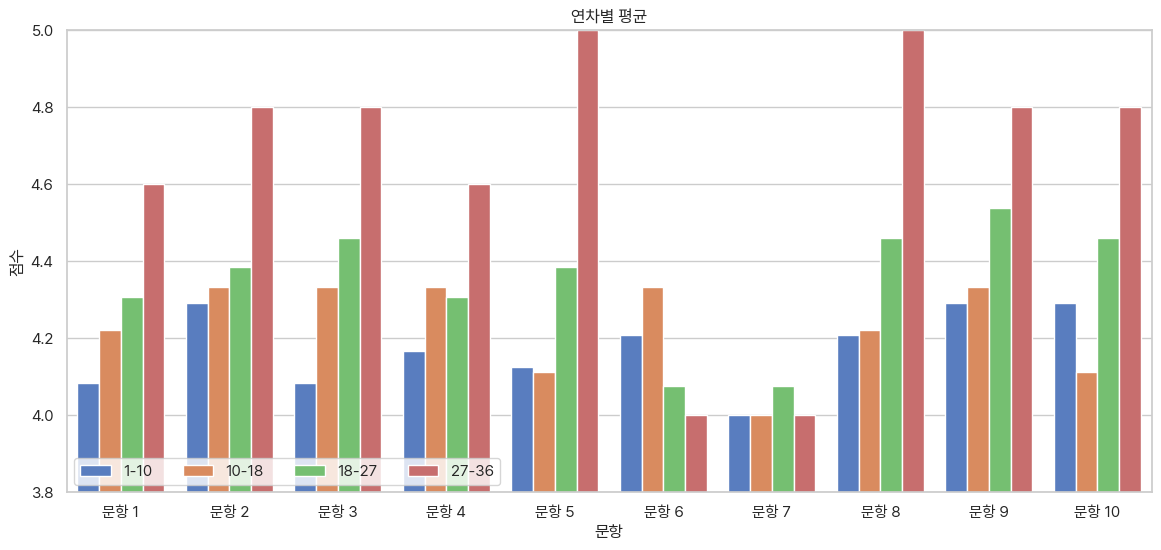

In [18]:
fig,ax=plt.subplots(figsize=(14,6))
sns.barplot(
    byExp,x="variable",y="value",hue="expCat",
    width=.8,
    errorbar=None,
    ax=ax,
    order=[f"q{q}" for q in range(1,11)],
    hue_order=["1-10","10-18","18-27","27-36"]
)

ax.set_title("연차별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)])
ax.set_ylim(3.8,5)
ax.set_ylabel("점수")
sns.move_legend(
    ax,
    title="",
    loc="lower left",
    ncol=4
)